# 문제를 풀기 위한 빌드업

In [1]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

# UCI 머신 러닝 저장소에서 유방암 데이터셋을 다운로드할 수 없을 때
# 다음 주석을 해제하고 로컬 경로에서 데이터셋을 적재하세요:

# df = pd.read_csv('wdbc.data', header=None)

df.head()

from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

# Learning curve

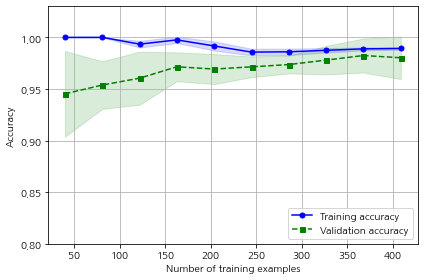

In [4]:
import numpy as np
import matplotlib.pyplot as plt
#Question
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1,
                                           max_iter=10000))

#Question
'''이거 너무 어려워요....'''
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()


# validation curve

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

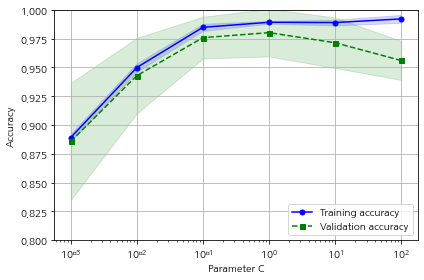

In [7]:
#Question
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

#Question
'''이거 너무 어려워요....'''
train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y=y_train,
                                            param_name='logisticregression__C',
                                            param_range=param_range, cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

# HYPERPARAMETER TUNING

**kaggle**  
https://www.kaggle.com/code/kanncaa1/machine-learning-tutorial-for-beginners/notebook

## Import

In [36]:
import numpy as np 
import warnings
# ignore warnings
warnings.filterwarnings("ignore")
from subprocess import check_output

## Read csv

In [38]:
data = pd.read_csv('column_3C_weka.csv') #수정
plt.style.use('ggplot')
# print(data.head().T)
# print(data['class'].unique())

                                  0           1           2           3  \
pelvic_incidence          63.027817   39.056951   68.832021   69.297008   
pelvic_tilt               22.552586   10.060991   22.218482   24.652878   
lumbar_lordosis_angle     39.609117   25.015378   50.092194   44.311238   
sacral_slope              40.475232    28.99596   46.613539    44.64413   
pelvic_radius             98.672917  114.405425  105.985135  101.868495   
degree_spondylolisthesis    -0.2544    4.564259   -3.530317   11.211523   
class                        Hernia      Hernia      Hernia      Hernia   

                                   4  
pelvic_incidence           49.712859  
pelvic_tilt                 9.652075  
lumbar_lordosis_angle      28.317406  
sacral_slope               40.060784  
pelvic_radius             108.168725  
degree_spondylolisthesis    7.918501  
class                         Hernia  
['Hernia' 'Spondylolisthesis' 'Normal']


## K-NEAREST NEIGHBORS (KNN)

In [39]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.iloc[:,:-1], data.iloc[:,-1] #수정
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Normal' 'Normal' 'Hernia'
 'Normal' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Normal' 'Normal' 'Normal' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Normal' 'Hernia'
 'Normal' 'Normal' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Normal' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthe

In [40]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.iloc[:,:-1], data.iloc[:,-1] #수정
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.8387096774193549


## ROC Curve with Logistic Regression

In [23]:
print(x_train)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
299         82.905351    29.894119              58.250542     53.011232   
288         74.565015    15.724320              58.618582     58.840695   
72          84.974132    33.021175              60.859873     51.952957   
15          44.318907    12.537992              36.098763     31.780915   
10          49.706610    13.040974              31.334500     36.665635   
..                ...          ...                    ...           ...   
188         85.680950    38.650035              82.680977     47.030914   
71          86.900794    32.928168              47.794347     53.972627   
106         65.013773     9.838262              57.735837     55.175511   
270         51.311771     8.875541              57.000000     42.436230   
102         70.399308    13.469986              61.200000     56.929322   

     pelvic_radius  degree_spondylolisthesis  
299     110.708958                  6.079338  
288  

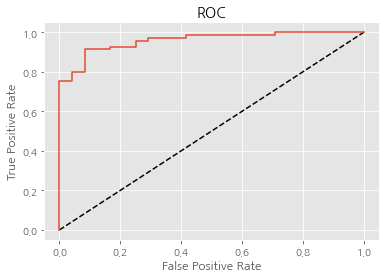

In [48]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# abnormal = 1 and normal = 0
data['class_binary'] = [0 if i == 'Normal' else 1 for i in data['class']] #수정
x = data.iloc[:,:-2]
y = data.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

# print(x.head())
# print(y.unique())
# print(data.head())

## HYPERPARAMETER TUNING

In [50]:
#Question
from sklearn.model_selection import GridSearchCV

grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()

#Question 
#hint! 어려워요...
knn_cv = GridSearchCV(knn, grid, cv=3)

knn_cv.fit(x,y)# Fit


print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 4}
Best score: 0.7559434901667911


In [53]:
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 12)
logreg = LogisticRegression()

#Question 
#hint!
logreg_cv = GridSearchCV(logreg, param_grid, cv=3)

logreg_cv.fit(x_train,y_train)

# Print the optimal parameters and best score
print("Tuned hyperparameters : ", logreg_cv.best_params_)
print("Best Accuracy: %.3f" % logreg_cv.best_score_)

Tuned hyperparameters :  {'C': 0.001, 'penalty': 'l2'}
Best Accuracy: 0.857
